# MSADS 507 M4

## Importing Libraries

In [41]:
import numpy as no
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')


userName = 'root'
userPass = 'yb%Q8!ec'

## Creating SQL DB Connection

In [119]:
conn=mysql.connect(host='localhost',port=int(3306),user='root',passwd='$$AfusA18800!!',db='gravity_books')

In [120]:
tableNames = pd.read_sql("""SHOW TABLES""", conn) 
tableNames

,Tables_in_gravity_books
0,address
1,address_status
2,author
3,book
4,book_author
5,book_language
6,country
7,cust_order
8,customer
9,customer_address


## Exploratory Data Analysis

In [44]:
# 1. Period: the transaction between ** to **

#latest order date:
a = pd.read_sql_query("""

SELECT order_date 
FROM cust_order
ORDER BY order_date DESC 
LIMIT 1

""" , con = conn) 
a

,order_date
0,2023-01-29 08:36:41


In [45]:
# earliest order date:

b = pd.read_sql_query("""

SELECT order_date 
FROM cust_order 
ORDER BY order_date
LIMIT 1

""" , con = conn) 
b

,order_date
0,2020-01-30 20:50:23


In [46]:
# order counts in the first year:

c = pd.read_sql_query("""

SELECT COUNT(*)
FROM cust_order
WHERE order_date BETWEEN '2020-02-06' AND '2021-02-05'

""" , con = conn) 
c

,COUNT(*)
0,2541


In [47]:
# order counts in the second year:

d = pd.read_sql_query("""

SELECT COUNT(*)
FROM cust_order
WHERE order_date BETWEEN '2021-02-06' AND '2022-02-05'

""" , con = conn) 
d

,COUNT(*)
0,2548


In [48]:
# order counts in the last year:

d = pd.read_sql_query("""

SELECT COUNT(*)
FROM cust_order
WHERE order_date BETWEEN '2022-02-06' AND '2023-02-05'

""" , con = conn) 
d

,COUNT(*)
0,2412


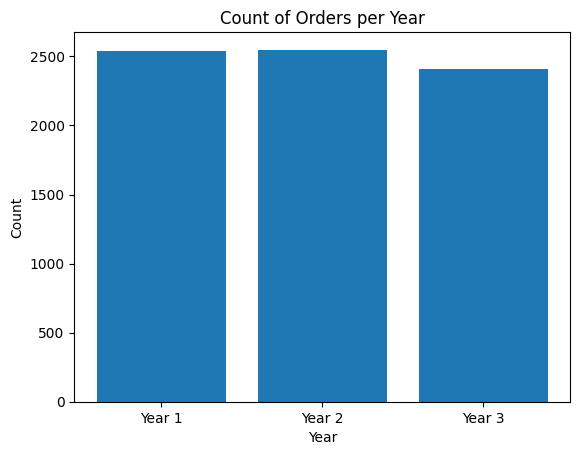

In [62]:
# plot of order counts
year = ['Year 1', 'Year 2', 'Year 3']
values = [2541, 2548, 2412]

plt.bar(year, values)
plt.title('Count of Orders per Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [49]:
# 2. How many orders and books are sold in total?

e = pd.read_sql_query("""

SELECT COUNT(order_id), COUNT(book_id) books_sold
FROM order_line;

""" , con = conn) 
e

,COUNT(order_id),books_sold
0,15400,15400


In [50]:
# 3. How many customer numbers are in the data?

f = pd.read_sql_query("""

SELECT COUNT(DISTINCT(customer_id)) 
FROM cust_order;

""" , con = conn) 
f

,COUNT(DISTINCT(customer_id))
0,1706


In [51]:
# 4. Which customer placed the most orders?

g = pd.read_sql_query("""

SELECT c.customer_id, c.first_name, c.last_name, COUNT(*) 
FROM customer c
LEFT JOIN cust_order co
ON c.customer_id = co.customer_id
GROUP BY c.customer_id
ORDER BY COUNT(DISTINCT( co.order_id)) DESC LIMIT 1;

""" , con = conn) 
g

,customer_id,first_name,last_name,COUNT(*)
0,1830,Noella,Ruddoch,21


In [52]:
# 5. What shipping method is most preferred, and what percentage of total

h = pd.read_sql_query("""

SELECT sm.method_name, COUNT(*),COUNT(*) * 100.0 / SUM(COUNT(*)) OVER() AS 'Percent of total'
FROM shipping_method sm
RIGHT JOIN cust_order co
ON sm.method_id = co.shipping_method_id
GROUP BY sm.method_name
ORDER BY COUNT(*) DESC;

""" , con = conn) 
h

,method_name,COUNT(*),Percent of total
0,Standard,1967,26.05298
1,International,1939,25.68212
2,Priority,1822,24.13245
3,Express,1822,24.13245


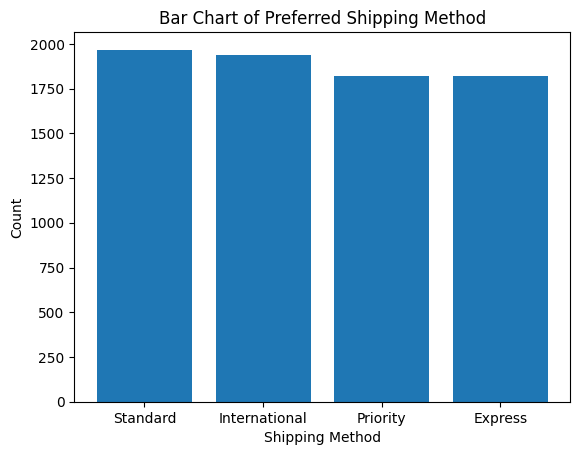

In [61]:
# plot of most preferred shipping method
plt.bar(h['method_name'], h['COUNT(*)'])
plt.title('Bar Chart of Preferred Shipping Method')
plt.ylabel('Count')
plt.xlabel('Shipping Method')
plt.show()

In [29]:
# 6. author who published the most books:

i = pd.read_sql_query("""

SELECT a.author_id, a.author_name, COUNT(DISTINCT(b.book_id)) AS 'Books Published'
FROM author a
INNER JOIN book_author ba
ON a.author_id = ba.author_id
INNER JOIN book b
ON ba.book_id = b.book_id 
GROUP BY a.author_id
ORDER BY COUNT(DISTINCT(b.book_id)) DESC
LIMIT 1;

""" , con = conn) 
i

,author_id,author_name,Books Published
0,8222,Stephen King,70


In [30]:
# 7. best-selling author

j = pd.read_sql_query("""

SELECT a.author_id, a.author_name, COUNT(ol.order_id) AS Num_Sold 
FROM author a
INNER JOIN book_author ba
ON a.author_id = ba.author_id
INNER JOIN book b
ON ba.book_id= b.book_id
INNER JOIN order_line ol
ON b.book_id = ol.book_id
GROUP BY a.author_id
ORDER BY COUNT(ol.order_id) DESC 
LIMIT 1;

""" , con = conn) 
j

,author_id,author_name,Num_Sold
0,8222,Stephen King,88


In [31]:
# 8. best-selling book
# books sold total

k = pd.read_sql_query("""

SELECT COUNT(book_id)
FROM order_line;

""" , con = conn) 
k

,COUNT(book_id)
0,15400


In [32]:
# DISTINCT books sold in total

l = pd.read_sql_query("""

SELECT COUNT(DISTINCT(book_id))
FROM order_line;

""" , con = conn) 
l

,COUNT(DISTINCT(book_id))
0,8352


In [33]:
# best-selling book

m = pd.read_sql_query("""

SELECT b.book_id, b.title, COUNT(*)
FROM book b
RIGHT JOIN order_line ol
ON b.book_id = ol.book_id
GROUP BY b.book_id
ORDER BY COUNT(*) DESC
LIMIT 10;

""" , con = conn) 
m

,book_id,title,COUNT(*)
0,9669,A Christmas Carol,8
1,1090,Difficult Conversations: How to Discuss What M...,7
2,7408,The Origin of Species,7
3,7707,Robert Frost: A Life,7
4,4465,The Black Dahlia (L.A. Quartet #1),7
5,4745,Sula,7
6,2634,Girl Meets Ape,6
7,90,And to Think That I Saw It on Mulberry Street,6
8,3178,The Diagnosis,6
9,3043,The Brothers Karamazov,6


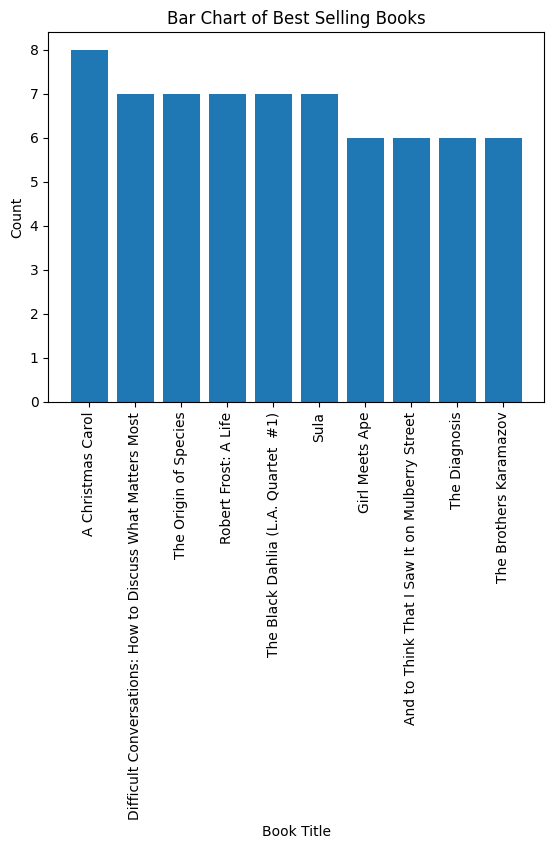

In [73]:
# plot of best selling book
plt.bar(m['title'], m['COUNT(*)'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Bar Chart of Best Selling Books')
plt.ylabel('Count')
plt.xlabel('Book Title')
plt.show()

In [34]:
# 9. Which book makes the most profit: 

n = pd.read_sql_query("""

SELECT ol.book_id, b.title, a.author_name, SUM(ol.price) 
FROM order_line ol
LEFT JOIN book b
ON ol.book_id = b.book_id
LEFT JOIN book_author ba
ON b.book_id = ba.author_id
LEFT JOIN author a
ON ba.author_id = a.author_id
GROUP BY ol.book_id 
ORDER BY SUM(ol.price) DESC 
LIMIT 1;

""" , con = conn) 
n

,book_id,title,author_name,SUM(ol.price)
0,3760,Sauron Defeated: The History of The Lord of th...,James Patterson,1160.64


In [35]:
# 10. The top five books with the most language versions 

o = pd.read_sql_query("""

SELECT b.title, b.book_id, bl.language_name, COUNT(*) 
FROM book b
LEFT JOIN book_language bl
ON b.language_id = bl.language_id
GROUP BY b.book_id
ORDER BY COUNT(DISTINCT(bl.language_name)) DESC 
LIMIT 5;

""" , con = conn) 
o

,title,book_id,language_name,COUNT(*)
0,The World's First Love: Mary Mother of God,1,United States English,1
1,The Illuminati,2,English,1
2,The Servant Leader,3,English,1
3,What Life Was Like in the Jewel in the Crown: ...,4,English,1
4,Cliffs Notes on Aristophanes' Lysistrata The ...,5,English,1


In [74]:
# 11. Books in different languages rank

p = pd.read_sql_query("""

SELECT bl.language_id, bl.language_name, COUNT(*), COUNT(*) * 100.0 / SUM(COUNT(*)) OVER() AS 'Percent of total'
FROM book_language bl
RIGHT JOIN book b
ON bl.language_id = b.language_id
GROUP BY b.language_id
ORDER BY COUNT(*) DESC;

""" , con = conn) 
p

,language_id,language_name,COUNT(*),Percent of total
0,1,English,8911,80.08448
1,2,United States English,1409,12.66289
2,4,Spanish,218,1.95920
3,5,British English,214,1.92325
4,3,French,144,1.29415
5,10,German,99,0.88973
6,11,Japanese,46,0.41341
7,6,Multiple Languages,19,0.17076
8,14,Chinese,14,0.12582
9,7,Greek,11,0.09886


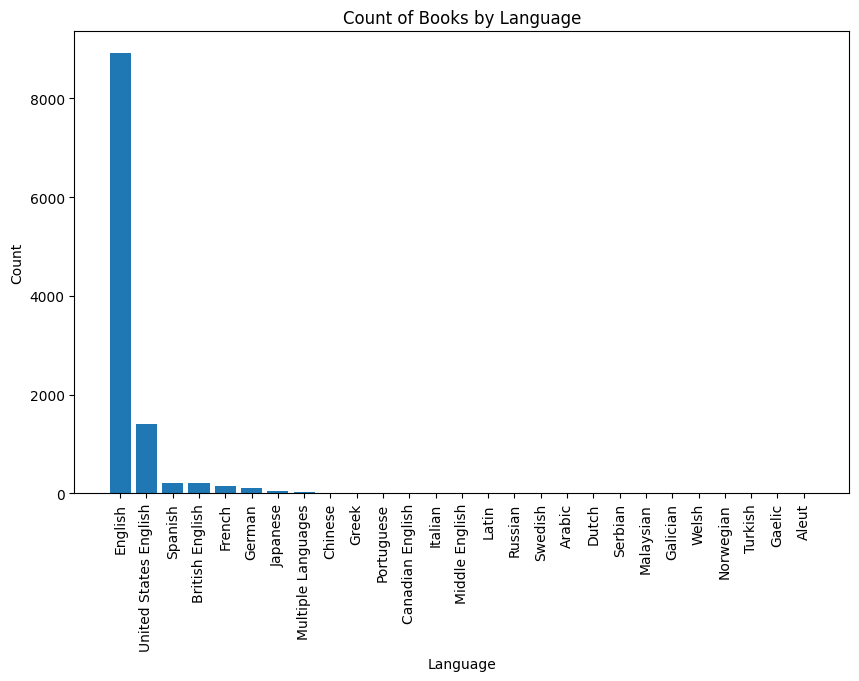

In [78]:
# plot of count of books in each language 
plt.figure(figsize=(10,6))
plt.bar(p['language_name'], p['COUNT(*)'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Count of Books by Language')
plt.ylabel('Count')
plt.xlabel('Language')
plt.show()

In [79]:
# 12. Which customer brings in the most profit?

q = pd.read_sql_query("""

SELECT c.customer_id, c.first_name, c.last_name, SUM(ol.price) AS Spent 
FROM customer c
INNER JOIN cust_order co
ON c.customer_id = co.customer_id
INNEr JOIN order_line ol
ON co.order_id = ol.order_id 
GROUP BY c.customer_id
ORDER BY Spent DESC
LIMIT 5;

""" , con = conn) 
q

,customer_id,first_name,last_name,Spent
0,1457,Trstram,Jellman,485.01
1,388,Jeramie,Leggis,414.18
2,1556,Emmet,Kupis,401.41
3,1599,Jeffry,Blasl,396.14
4,1830,Noella,Ruddoch,392.72


In [80]:
# 13. The top five cities have the most orders placed by customers. 

r = pd.read_sql_query("""

SELECT ad.city, ctr.country_name, COUNT(*), COUNT(*) * 100.0 / SUM(COUNT(*)) OVER() AS 'Percent of total'
FROM address ad
INNER JOIN customer_address ca
ON ad.address_id = ca.address_id
INNER JOIN cust_order co
ON ca.customer_id = co.customer_id
INNER JOIN order_line ol
ON co.order_id = ol.order_id
INNER JOIN country ctr
ON ad.country_id = ctr.country_id
GROUP BY ad.city, ctr.country_name
ORDER BY COUNT(*) DESC 
LIMIT 5;

""" , con = conn) 
r

,city,country_name,COUNT(*),Percent of total
0,Holoubkov,Czech Republic,201,0.63830
1,Dallas,United States of America,195,0.61924
2,Teeli,Russia,168,0.53350
3,Wińsko,Poland,166,0.52715
4,Quebradas,Honduras,162,0.51445


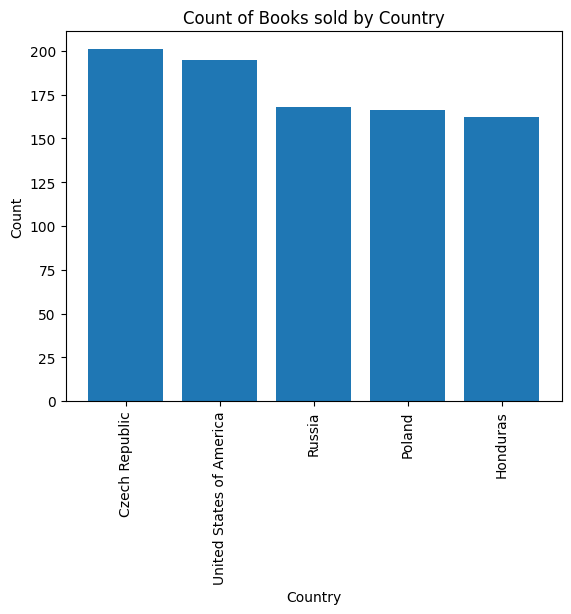

In [83]:
# plot of top 5 countries customers placed orders in 
plt.bar(r['country_name'], r['COUNT(*)'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Count of Books sold by Country')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

## Adding External Data Sources

In [86]:
popdata = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_4770387_2.csv')
incomedata = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_4770387_2.csv')

In [87]:
print(popdata.shape)
print(popdata.columns)
popdata

(265, 4)
Index(['countrycode', 'countryname', 'population2020', 'population2021'], dtype='object')


,countrycode,countryname,population2020,population2021
0,ABW,Aruba,106585,106537
1,AFE,Africa Eastern and Southern,685112705,702976832
2,AFG,Afghanistan,38972230,40099462
3,AFW,Africa Western and Central,466189102,478185907
4,AGO,Angola,33428486,34503774
...,...,...,...,...
260,XKX,Kosovo,1790133,1786038
261,YEM,"Yemen, Rep.",32284046,32981641
262,ZAF,South Africa,58801927,59392255
263,ZMB,Zambia,18927715,19473125


In [88]:
r = pd.read_sql_query("""
drop table population;
""" , con = conn) 

## May output error table does not exist, this is just helpful for restart.

DatabaseError: Execution failed on sql '
drop table population;
': (1051, "Unknown table 'gravity_books.population'")

In [89]:
r = pd.read_sql_query("""
create TABLE population (
	countrycode varchar(5),
	countryname varchar(100),
	population2020 bigint,
	population2021 bigint
	)
""" , con = conn) 

## Will always output error TypeError: 'NoneType' object is not iterable -- you can ignore

TypeError: 'NoneType' object is not iterable

In [90]:
cursor = conn.cursor()
for i,row in popdata.iterrows():
            sql = "INSERT INTO population VALUES (%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            conn.commit()

In [91]:
pd.read_sql_query("""
select * from population
""" , con = conn)

,countrycode,countryname,population2020,population2021
0,ABW,Aruba,106585,106537
1,AFE,Africa Eastern and Southern,685112705,702976832
2,AFG,Afghanistan,38972230,40099462
3,AFW,Africa Western and Central,466189102,478185907
4,AGO,Angola,33428486,34503774
...,...,...,...,...
260,XKX,Kosovo,1790133,1786038
261,YEM,"Yemen, Rep.",32284046,32981641
262,ZAF,South Africa,58801927,59392255
263,ZMB,Zambia,18927715,19473125


In [92]:
print(incomedata.shape)
print(incomedata.columns)
incomedata

(265, 4)
Index(['countrycode', 'region', 'incomegroup', 'countryname'], dtype='object')


,countrycode,region,incomegroup,countryname
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFE,NaN,NaN,Africa Eastern and Southern
2,AFG,South Asia,Low income,Afghanistan
3,AFW,NaN,NaN,Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,Angola
...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Kosovo
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
263,ZMB,Sub-Saharan Africa,Low income,Zambia


In [93]:
incomedata = incomedata.dropna()

In [94]:
r = pd.read_sql_query("""
drop table income;
""" , con = conn) 

## May output error table does not exist, this is just helpful for restart.

DatabaseError: Execution failed on sql '
drop table income;
': (1051, "Unknown table 'gravity_books.income'")

In [95]:
r = pd.read_sql_query("""
create TABLE income (
	countrycode varchar(5),
	region varchar(255),
	incomegroup varchar(255),
	countryname varchar(100)
)
""" , con = conn) 

## Will always output error TypeError: 'NoneType' object is not iterable -- you can ignore

TypeError: 'NoneType' object is not iterable

In [96]:
cursor = conn.cursor()
for i,row in incomedata.iterrows():
            sql = "INSERT INTO income VALUES (%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            conn.commit()

In [150]:
s = pd.read_sql_query("""
select * from income
""" , con = conn)

s

,countrycode,region,incomegroup,countryname
0,ABW,Latin America & Caribbean,High income,Aruba
1,AFG,South Asia,Low income,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,Angola
3,ALB,Europe & Central Asia,Upper middle income,Albania
4,AND,Europe & Central Asia,High income,Andorra
...,...,...,...,...
211,XKX,Europe & Central Asia,Upper middle income,Kosovo
212,YEM,Middle East & North Africa,Low income,"Yemen, Rep."
213,ZAF,Sub-Saharan Africa,Upper middle income,South Africa
214,ZMB,Sub-Saharan Africa,Low income,Zambia


In [ ]:
# income plot 
values = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income']

plt.ba)

In [98]:
pd.read_sql_query("""
select * from country
""" , con = conn)

,country_id,country_name
0,1,Afghanistan
1,2,Netherlands Antilles
2,3,Albania
3,4,Algeria
4,5,Andorra
...,...,...
227,228,Yugoslavia
228,229,Zambia
229,230,Zimbabwe
230,231,Singapore


In [99]:
pd.read_sql_query("""
select * from country c
join income i on i.countryname = c.country_name
""" , con = conn)

## There are only matches on 175 rows

,country_id,country_name,countrycode,region,incomegroup,countryname
0,1,Afghanistan,AFG,South Asia,Low income,Afghanistan
1,3,Albania,ALB,Europe & Central Asia,Upper middle income,Albania
2,4,Algeria,DZA,Middle East & North Africa,Lower middle income,Algeria
3,5,Andorra,AND,Europe & Central Asia,High income,Andorra
4,6,Angola,AGO,Sub-Saharan Africa,Lower middle income,Angola
...,...,...,...,...,...,...
170,221,Vietnam,VNM,East Asia & Pacific,Lower middle income,Vietnam
171,229,Zambia,ZMB,Sub-Saharan Africa,Low income,Zambia
172,230,Zimbabwe,ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe
173,231,Singapore,SGP,East Asia & Pacific,High income,Singapore


In [100]:
pd.read_sql_query("""
select * from country c
join population p on p.countryname = c.country_name
""" , con = conn)

## There are only matches on 175 rows

,country_id,country_name,countrycode,countryname,population2020,population2021
0,11,Aruba,ABW,Aruba,106585,106537
1,1,Afghanistan,AFG,Afghanistan,38972230,40099462
2,6,Angola,AGO,Angola,33428486,34503774
3,3,Albania,ALB,Albania,2837849,2811666
4,5,Andorra,AND,Andorra,77700,79034
...,...,...,...,...,...,...
170,175,Samoa,WSM,Samoa,214929,218764
171,111,Kosovo,XKX,Kosovo,1790133,1786038
172,171,South Africa,ZAF,South Africa,58801927,59392255
173,229,Zambia,ZMB,Zambia,18927715,19473125


In [183]:
# amount spent by country
t = pd.read_sql_query("""
select distinct
    i.incomegroup, 
    pop.population2020, 
    pop.population2021,
    c.country_name as country,
    sum(ol.price) over (partition by c.country_name, i.incomegroup) as 'Total amount spent by country and income group'
from cust_order co
join order_line ol on ol.order_id = co.order_id
join customer_address ca on ca.customer_id = co.customer_id
join address a on a.address_id = ca.address_id
join country c on c.country_id = a.country_id
join income i on i.countryname = c.country_name
join population pop on pop.countryname = i.countryname
ORDER BY 5 DESC
;
""" , con = conn)

t

,incomegroup,population2020,population2021,country,Total amount spent by country and income group
0,Upper middle income,1411100000,1412360000,China,52528.83
1,Lower middle income,271857970,273753191,Indonesia,41001.72
2,High income,37899070,37747124,Poland,13489.46
3,Lower middle income,112190977,113880328,Philippines,13351.89
4,High income,10297081,10325147,Portugal,12309.05
...,...,...,...,...,...
86,High income,9215100,9364000,Israel,91.84
87,Low income,44404611,45853778,Uganda,56.85
88,Low income,117190911,120283026,Ethiopia,43.34
89,Upper middle income,18755666,19000988,Kazakhstan,16.85


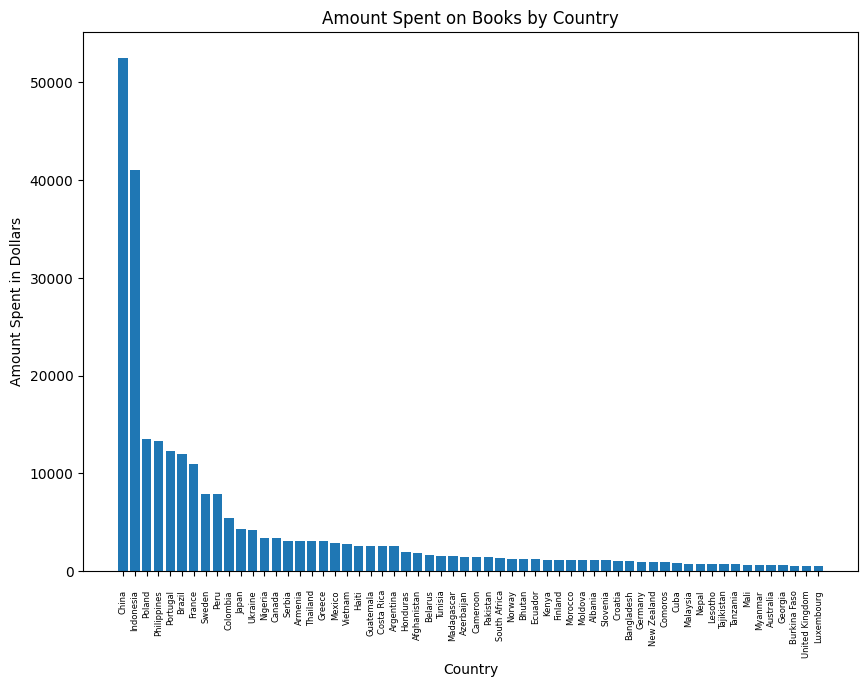

In [182]:
# bar chart of amoutn spent by country 
plt.figure(figsize=(10,7))
plt.bar(t['country'], t['Total amount spent by country and income group'])
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
plt.title('Amount Spent on Books by Country')
plt.ylabel('Amount Spent in Dollars')
plt.xlabel('Country')
plt.show()

# Note: interesting that while china spends the most in dollars on books, they aren't the first in number of orders, meaning that on average chinese customers are buying more expensive books. 
# This is likely related to incomegroup.